
# Clustering individuals as per their demographics / Bireyleri demografik özelliklerine göre kümeleme

### In this case study, we will use clustering methods to identify different types of investors. / Bu vaka çalışmasında, farklı yatırımcı türlerini belirlemek için kümeleme yöntemlerini kullanacağız.

## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#5)        
    * [5.1. k-Means Clustering](#5.1)
        * [5.1.1 Finding right number of clusters](#5.1.1)   
    * [5.2. Affinity Propagation Clustering](#5.2)
    * [5.3. Cluster Evaluation](#5.3)
* [6.Cluster Intuition](#6)     
    
#### -----------------------------------------------------------------

* [1. Problem Tanımı](#0)
* [2. Başlarken - Kitaplıkları ve Veri Kümesini Yükleyin](#1)
    * [2.1. Kitaplıkları Yükle](#1.1)
    * [2.2. Veri Kümesini Yükle](#1.2)
* [3. Keşif Veri Analizi](#2)
    * [3.1 Tanımlayıcı İstatistikler](#2.1)
    * [3.2. Veri Görselleştirme](#2.2)
* [4. Veri Hazırlama](#3)
    * [4.1 Veri Temizleme](#3.1)
    * [4.3.Veri Dönüştürme](#3.2)
* [5. Algoritmaları ve Modelleri Değerlendirin](#5)
    * [5.1. k-Kümeleme anlamına gelir](#5.1)
        * [5.1.1 Doğru küme sayısını bulma](#5.1.1)
    * [5.2. Yakınlık Yayılımı Kümelemesi](#5.2)
    * [5.3. Küme Değerlendirmesi](#5.3)
* [6.Küme Sezgisi](#6)

<a id='0'></a>
# 1. Problem Definition / Problem tanımı

The goal of this case study is to build a machine learning model to cluster individuals/investors based on the parameters related to the ability and willingness to take risk. We will focus on using common demographic and financial characteristics to accomplish this.

For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve Board, which has been used in the case studies in chapter 5 and chapter 6. 

##### ------------------------------------------------------

Bu vaka çalışmasının amacı, risk alma yeteneği ve istekliliği ile ilgili parametrelere dayalı olarak bireyleri/yatırımcıları kümelemek için bir makine öğrenimi modeli oluşturmaktır. Bunu başarmak için ortak demografik ve finansal özellikleri kullanmaya odaklanacağız.

Bu örnek olay incelemesi için kullanılan veriler, bölüm 5 ve bölüm 6'daki örnek olay incelemelerinde kullanılan Federal Rezerv Kurulu tarafından yürütülen Tüketici Finansmanı anketinden alınmıştır.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages / Başlarken - Verileri ve python paketlerini yükleme

<a id='1.1'></a>
## 2.1. Loading the python packages / Python paketlerini yükleme

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


import matplotlib.ticker as ticker
from itertools import cycle

<a id='1.2'></a>
## 2.2. Loading the Data / Verileri Yükleme

The dataset is same as the dataset used, which is further processed to give the following attributes for different investors for the year 2007.

Veri seti, 2007 yılı için farklı yatırımcılar için aşağıdaki öznitelikleri vermek üzere işlenen, kullanılan veri seti ile aynıdır.

In [16]:
!pip install openpyxl
dataset = pd.read_excel('ProcessedData.xlsx')

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis / Keşifsel Veri Analizi

<a id='2.1'></a>
## 3.1. Descriptive Statistics / Descriptive Statistics

In [19]:
dataset.shape

(3866, 13)

In [20]:
set_option('display.width', 100)
dataset.head(5)

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


As we can see in the table above, there are 12 attributes for each of the individuals. These attributes can be categorized as demographic, financial and behavioral attributes. 

Yukarıdaki tabloda da görebileceğimiz gibi, bireylerin her biri için 12 özellik vardır. Bu özellikler demografik, finansal ve davranışsal özellikler olarak kategorize edilebilir.

In [21]:
pd.set_option('display.precision', 3)
dataset.describe()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
count,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000
mean,1933.500,3.107,2.906,1.353,0.938,3.697,1.742,3.043,0.717,2.446,3.561,2.976,3.671
std,1116.162,1.513,1.066,0.478,1.249,1.618,0.934,0.879,0.451,0.743,1.304,1.463,1.184
min,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,967.250,2.000,2.000,1.000,0.000,3.000,1.000,2.000,0.000,2.000,2.000,2.000,3.000
50%,1933.500,3.000,3.000,1.000,0.000,3.000,1.000,3.000,1.000,3.000,4.000,3.000,4.000
75%,2899.750,4.000,4.000,2.000,2.000,5.000,3.000,4.000,1.000,3.000,5.000,4.000,5.000
max,3866.000,6.000,4.000,2.000,8.000,6.000,4.000,4.000,1.000,3.000,5.000,5.000,5.000


<a id='2.2'></a>
## 3.2. Data Visualization / Veri görselleştirme

Let us look at the correlation. We will take a detailed look into the visualization post clustering.

Korelasyona bakalım. Kümeleme sonrası görselleştirmeye ayrıntılı olarak bakacağız.

<Axes: title={'center': 'Correlation Matrix'}>

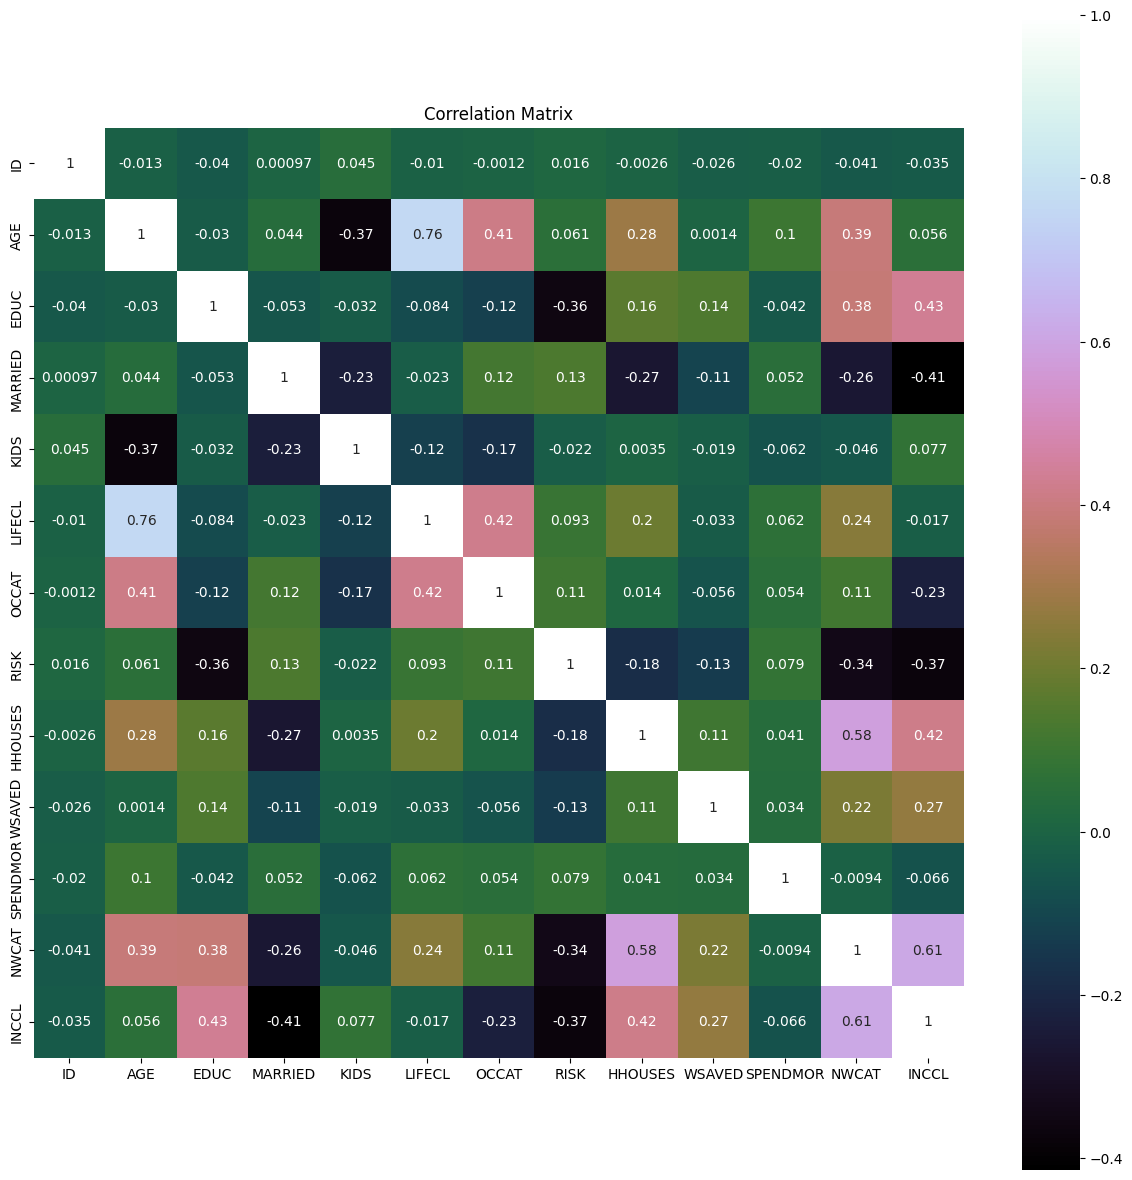

In [22]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the picture above there is a significant positive correlation between the stocks. 

Yukarıdaki resimde de görüldüğü gibi hisse senetleri arasında pozitif yönde anlamlı bir korelasyon bulunmaktadır.

<a id='3'></a>
## 4. Data Preparation / Veri Hazırlama

<a id='3.1'></a>
## 4.1. Data Cleaning / Veri temizleme
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column.

Satırlardaki NA'ları kontrol edelim, ya bırakalım ya da sütunun ortalamasıyla dolduralım.

In [23]:
#Checking for any null values and removing the null values'''
#Boş değerlerin kontrol edilmesi ve boş değerlerin kaldırılması'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


Given there isn't any missing data and the data is already in the categorical format no further data cleaning was performed. The ID column which is not needed is dropeed

Eksik veri olmadığı ve verilerin zaten kategorik formatta olduğu göz önüne alındığında, başka bir veri temizleme işlemi yapılmadı. Gerekli olmayan kimlik sütunu bırakılır

In [24]:
X=dataset.copy("deep")
X=X.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


<a id='3.2'></a>
## 4.2. Data Transformation / Veri Dönüşümü

The data available is comprised of attributes with similar scale. Hence no data transformation is required. 

Mevcut veriler, benzer ölçeğe sahip özniteliklerden oluşur. Bu nedenle herhangi bir veri dönüşümü gerekmez.

<a id='4'></a>
# 5. Evaluate Algorithms and Models / Algoritmaları ve Modelleri Değerlendirin

In this step, we will look at the following models and perform further analysis and visualization.

Bu adımda, aşağıdaki modellere bakacağız ve daha fazla analiz ve görselleştirme yapacağız.

1. K-means
2. Affinity Propagation

<a id='5.1'></a>
## 5.1. K-Means Clustering / K-Kümeleme anlamına gelir


In this step we look at the following metrices to get the optimum number of clusters

Bu adımda, optimum küme sayısını elde etmek için aşağıdaki ölçümlere bakıyoruz.

1. Sum of square errors (SSE) within clusters
2. Silhouette score.

<a id='5.1.1'></a>
### 5.1.1. Finding optimal number of clusters / Optimal küme sayısını bulma

Typically, two metrics are used to evaluate the number of clusters in K-means model.

Tipik olarak, K-means modelindeki küme sayısını değerlendirmek için iki metrik kullanılır.

1. Sum of square errors (SSE) within clusters
2. Silhouette score


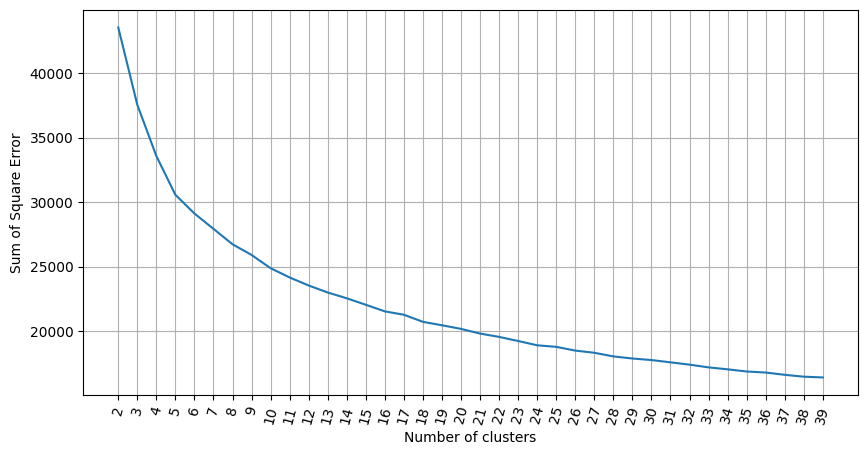

In [25]:
distorsions = []
max_loop=40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Error")
plt.grid(True)

In [26]:
!pip install --upgrade scikit-learn


#### Silhouette score / Siluet puanı

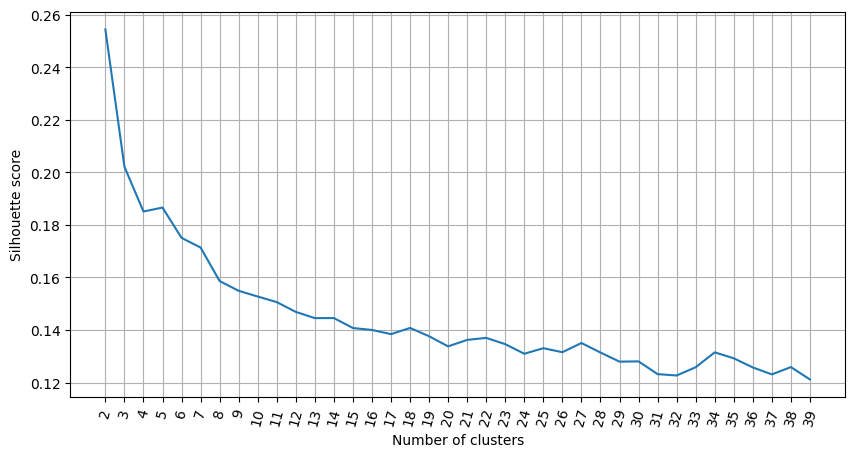

In [27]:
silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid(True)


Looking at both the charts above, the optimum number of clusters seem to be around 7. We can see that as the number of clusters increase pass 6, the sum of square of
errors within clusters plateaus off. From the second graph, we can see that there are
various parts of the graph where a kink can be seen. Since there is not much a difference in SSE after 7 clusters, we would use 7 clusters in the k-means model below.
### -------------------------------------------------------------------
Yukarıdaki her iki grafiğe de bakıldığında, optimum küme sayısı 7 civarında görünmektedir. Küme sayısı arttıkça 6'yı geçerken,
kümeler içindeki hatalar kapalı platolardır. İkinci grafikten, olduğunu görebiliriz
grafiğin bir bükülmenin görülebileceği çeşitli kısımları. 7 kümeden sonra SSE'de pek bir fark olmadığı için aşağıdaki k-means modelinde 7 küme kullanırdık.

<a id='5.1.2'></a>
### 5.1.2. Clustering and Visualisation / Kümeleme ve Görselleştirme

In [28]:
nclust=7

In [29]:
#Fit with k-means
#K-means ile sığdır
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=7)

In [30]:
#Extracting labels
#Etiketleri çıkarma
target_labels = k_means.predict(X)

<a id='5.2'></a>
## 5.2. Affinity Propagation / Afinite Yayılımı

In [31]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

In [32]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters/Tahmini küme sayısı: %d' % n_clusters_)

Estimated number of clusters/Tahmini küme sayısı: 161


<a id='5.3'></a>
## 5.3. Cluster Evaluation / Küme Değerlendirmesi

We evaluate the clusters using Silhouette Coefficient (sklearn.metrics.silhouette_score). Higher Silhouette Coefficient score means a model with better defined clusters.

Kümeleri Silhouette Katsayısı (sklearn.metrics.silhouette_score) kullanarak değerlendiriyoruz. Daha yüksek Siluet Katsayısı puanı, daha iyi tanımlanmış kümelere sahip bir model anlamına gelir.

In [33]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.16717656141728765
ap 0.0980773034564264


k-means has much higher Silhouette Coefficient as compared to the affinity propagation. 

k-means, afinite yayılımına kıyasla çok daha yüksek Siluet Katsayına sahiptir.

<a id='6'></a>
# 6. Cluster Intuition /  Küme Sezgisi
In the next step, we will check each cluster and understand the intuition behind the clusters. 

Bir sonraki adımda, her kümeyi kontrol edeceğiz ve kümelerin arkasındaki sezgiyi anlayacağız.

In [34]:
cluster_output= pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'])],axis = 1)
output=cluster_output.groupby('cluster').mean()
output

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
cluster,,,,,,,,,,,,
0,2.522,3.525,1.123,1.686,2.861,1.434,2.560,0.918,2.582,1.945,4.224,4.702
1,1.919,2.879,1.629,0.003,1.375,1.533,3.161,0.430,2.407,3.541,1.858,3.041
2,4.825,2.158,1.575,0.191,5.613,2.360,3.543,0.710,2.266,3.869,2.366,2.682
3,1.878,2.375,1.344,2.184,3.365,1.457,3.428,0.484,2.214,4.532,1.662,3.048
4,1.864,2.359,1.312,2.031,3.325,1.448,3.304,0.469,2.199,2.042,1.652,3.089
5,2.443,3.459,1.156,1.445,2.723,1.399,2.545,0.951,2.716,4.431,3.947,4.608
6,4.677,3.464,1.226,0.299,5.356,2.085,2.751,0.943,2.631,3.584,4.524,4.509


### Demographics Features / Demografi Özellikleri

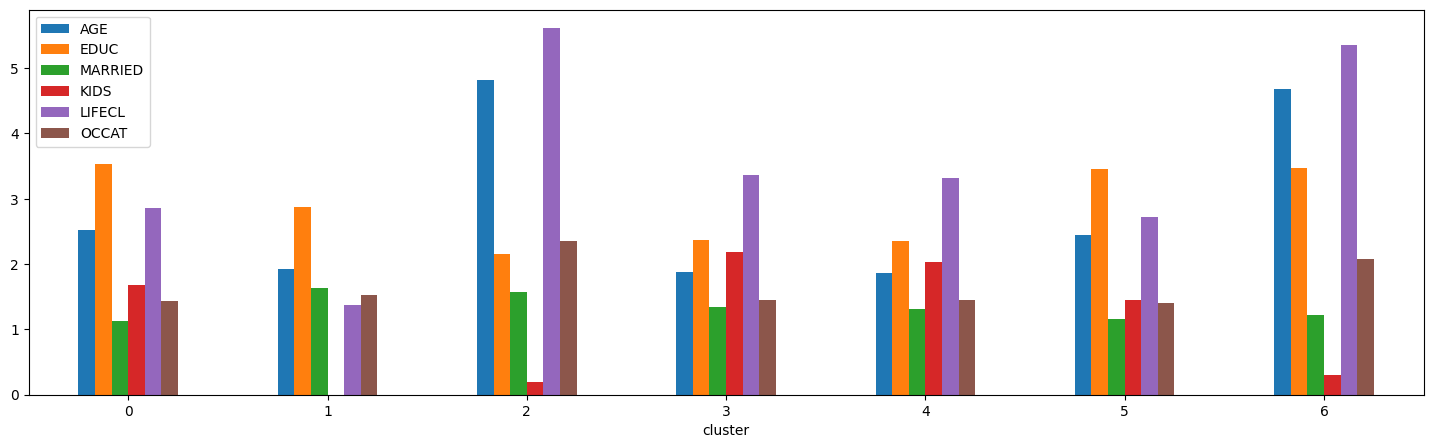

In [35]:
output[['AGE','EDUC','MARRIED','KIDS','LIFECL','OCCAT']].plot.bar(rot=0, figsize=(18,5));

The plot here shows the average value of the attributes for each of the clusters. For
example, comparing cluster 0 and cluster 1, cluster 0 has lower average age, yet higher
average education. In terms of marriage and number of children, these two clusters
are similar. So, the individuals in cluster 0 will on an average have higher risk toler‐
ance as compared to the individuals in cluster 1, based on the demographic attributes.

#### ------------------------------------------------------------------------------------------------------------------------------------------------

Buradaki çizim, kümelerin her biri için niteliklerin ortalama değerini gösterir. İçin
örneğin, küme 0 ve küme 1 karşılaştırıldığında, küme 0'ın ortalama yaşı daha düşük, ancak daha yüksektir
ortalama eğitim. Evlilik ve çocuk sayısı açısından bu iki küme
benzerdir. Yani, küme 0'daki bireyler ortalama olarak daha yüksek risk toleransına sahip olacaktır.
demografik özelliklere dayalı olarak 1. kümedeki bireylerle karşılaştırıldığında.

### Financial Features and Features related to willingness to take risk / Finansal Özellikler ve Risk Alma İsteğine İlişkin Özellikler

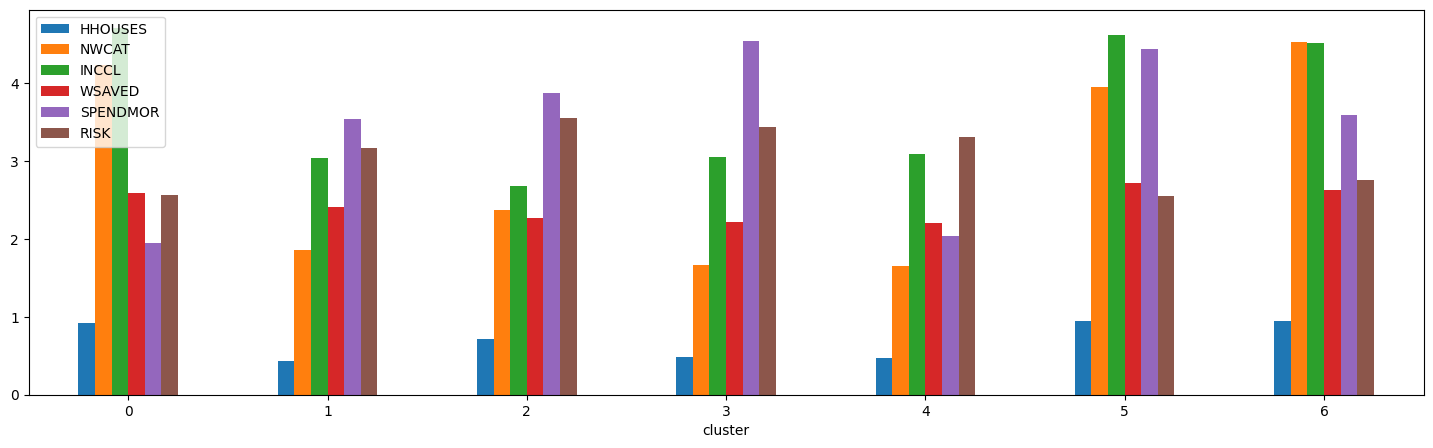

In [36]:
output[['HHOUSES','NWCAT','INCCL','WSAVED','SPENDMOR','RISK']].plot.bar(rot=0, figsize=(18,5));

The plot here shows the average value of the attributes for each of the cluster on the
financial and behavioral attributes. For example, comparing cluster 0 and cluster 1,
cluster 0 has higher average house ownership, higher average net worth and income,
and a lower willingness to take risk. In terms of saving vs. income comparison and
willingness to save, the two clusters are comparable. Therefore, we can posit that the
individuals in cluster 0 will, on average, have a higher ability, yet lower willingness, to
take risk compared with cluster 1.

#### ---------------------------------------------------------------------------------- 

Buradaki çizim, kümedeki her bir küme için özniteliklerin ortalama değerini gösterir.
finansal ve davranışsal özellikler. Örneğin, küme 0 ile küme 1'i karşılaştırarak,
0 kümesi daha yüksek ortalama ev sahipliğine, daha yüksek ortalama net değere ve gelire sahiptir,
ve risk alma konusunda daha düşük isteklilik. Tasarruf ve gelir karşılaştırması açısından ve
tasarruf etme isteği, iki küme karşılaştırılabilir. Bu nedenle, şunu söyleyebiliriz:
0 kümesindeki bireyler, ortalama olarak, daha yüksek bir yeteneğe sahip olacak, ancak
küme 1 ile karşılaştırıldığında risk almak.

<Axes: xlabel='cluster'>

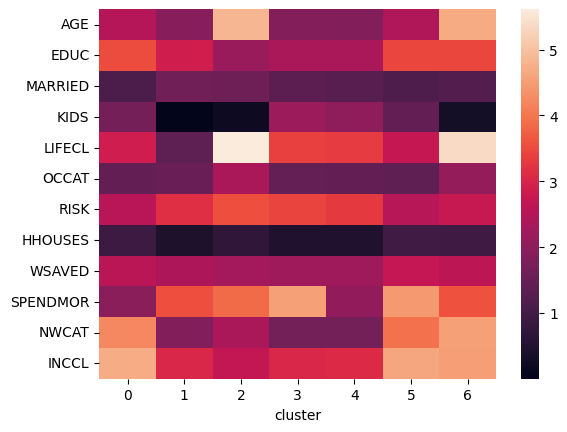

In [37]:
sns.heatmap(output.T)

Combining the information from the demographics, financial, and behavioral
attributes for cluster 0 and cluster 1, the overall ability to take risk for individual clus‐
ter 0 is higher as compared to cluster 1. Performing similar analysis across all other
clusters, we summarize the results in the table below. The risk tolerance column rep‐
resents the subjective assessment of the risk tolerance of each of the clusters.

| Cluster| Features | Risk Capacity |
| --- | --- | --- |
| Cluster 0	 | Low Age, High Networth and Income, Less risky life category, willingness to spend more | High |
| Cluster 1	 | High Age, low net worth and Income, highly risky life category, Willing ness to take risk, low education | High |
| Cluster 2	 | High Age, high net worth and Income, highly risky life category, Willing ness to to take risk, own house | Medium |
| Cluster 3	 | 	Low age, very low income and net worth, high willingness to take risk, many kids | Low |
| Cluster 4	 | Medium age, very high income and net worth, high willingness to take risk, many kids, own house | High |
| Cluster 5	 | Low age, very low income and net worth, high willingness to take risk, no kids | Medium |
| Cluster 6	 | Low age, medium income and net worth, high willingness to take risk, many kids, own house | Low |

##### ------------------------------------------------------------------------------------------------------

Demografik, finansal ve davranışsal verilerden elde edilen bilgilerin birleştirilmesi
küme 0 ve küme 1 için öznitelikler, bireysel küme için genel risk alma yeteneği
ter 0, küme 1'e kıyasla daha yüksektir.
kümeler, sonuçları aşağıdaki tabloda özetliyoruz. Risk toleransı sütun temsilcisi
kümelerin her birinin risk toleransının öznel değerlendirmesine içerler.

| Küme| Özellikler | Risk Kapasitesi |
| --- | --- | --- |
| Küme 0 | Düşük Yaş, Yüksek Net Değer ve Gelir, Daha az riskli yaşam kategorisi, daha fazla harcama isteği | Yüksek |
| Küme 1 | Yüksek Yaş, düşük net değer ve Gelir, yüksek riskli yaşam kategorisi, Risk almaya isteklilik, düşük eğitim | Yüksek |
| Küme 2 | Yüksek Yaş, Yüksek Net Varlık ve Gelir, Yüksek Riskli Yaşam Kategorisi, Risk Almaya İstekli, Ev Sahibi | Orta |
| Küme 3 | Düşük yaş, çok düşük gelir ve net değer, yüksek risk alma isteği, birçok çocuk | Düşük |
| Küme 4 | Orta yaş, çok yüksek gelir ve net değer, yüksek risk alma isteği, çok çocuk, kendi evi | Yüksek |
| Küme 5 | Düşük yaş, çok düşük gelir ve net değer, yüksek risk alma isteği, çocuk yok | Orta |
| Küme 6 | Düşük yaş, orta gelir ve net varlık, yüksek risk alma isteği, çok çocuk, kendi evi | Düşük |

**_Conclusion/Çözüm_**

One of the key takeaways from this case study is the approach to understand the cluster intuition. We used visualization techniques to understand the expected behavior of a cluster member by qualitatively interpreting mean values of the variables in each
cluster. 

We demonstrate the efficiency of the clustering technique in discovering the natural intuitive groups of different investors based on their risk tolerance.

Given, the clustering algorithms can successfully group investors based on different factors, such as age, income, and risk tolerance, it can further
used by portfolio managers to understand the investor’s behavior and standardize the portfolio allocation and rebalancing across the clusters, making the investment management process faster and effective.


#### -------------------------------------------------------------------------------------------------------------------


Bu örnek olay incelemesinin en önemli çıkarımlarından biri, kümelenme sezgisini anlama yaklaşımıdır. Her kümedeki değişkenlerin ortalama değerlerini niteliksel olarak yorumlayarak bir grupta toplanan beklenen davranışı anlamak için görselleştirme kullanımı kullandık.
küme.

Risk toleranslarına dayalı olarak farklı defterlerin doğal olarak ayrılan gruplarını keşfetmede toplama tekniğinin gözlemlediğini gösteriyoruz.

Kümeleme düşünceleri, yatırımcıları yaş, gelir ve risk toleransı gibi farklı faktörlere göre başarılı bir şekilde gruplayabilir.
Portföy yapılandırması tarafından yatırımcının yönetimini anlamak ve bir araya getirmek için büyük miktarda portföy tahsisini ve yeniden bağlantılarını standartlaştırarak yatırım yönetimini daha hızlı ve etkili hale getirmek için kullanılır.